In [1]:
import pandas as pd
import numpy as np
import time
import re
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors, tree, ensemble, naive_bayes, svm
from sklearn.multioutput import MultiOutputClassifier#--------------------------------
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve#------------------------
import itertools#---------------------------------
from matplotlib.colors import ListedColormap#------------------------------------
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler#----------------------
from sklearn.decomposition import PCA#--------------------------
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
dataset = pd.read_csv(r'C:\Users\royi5\Desktop\DataScience Project\ShufersalDataset.csv',encoding='utf-16')
dataset=dataset.set_index('שם המוצר')

# Data arrangement
the dataframe after the crawling has some problem that i will need to take care of before using the data

problem: dataframe has many columns that not all the items have data in this feature

solution: revmoving columns the doesnt have at least 1000 rows with data in this feature

problem: dataframe has values in type of string that has comma in them, for example: "1,200"

solution: removing the comma and convert the string to a integer

problem: dataframe has values with hewbrew letter attached to the number, for example: "פחות מ0.5".

solution: ill counte "less then 0.5" as 0.5 and do the same method as before but with removing letters

problem: the rest of the dataframe are full of string of number, for example "25"

solution: converting them to integers

problem: there are None values in the dataframe

solution: since the values represent amount, i can count it as being 0

In [3]:

df=dataset.copy()
df.drop_duplicates(keep='first',inplace=True)

df.dropna(axis='columns',thresh=1000,inplace=True)

df=df.reindex(columns=['אנרגיה','שומנים','מתוכם שומן רווי','חומצות שומן טרנס','כולסטרול','נתרן','פחמימות','סוכרים מתוך פחמימות'
                       ,'כפיות סוכר','חלבונים','סיבים תזונתיים','נתרן בכמות גבוהה','סוכר בכמות גבוהה','שומן רווי בכמות גבוהה','הסימון הירוק'])
  
#apply the changes to each element in the dataframe

#if the element is an instance of the str class and if the element, after removing commas, is a digit 
#->converts the string to an integer
df = df.applymap(lambda x: int(x.replace(",","")) if isinstance(x, str) and x.replace(",","").isdigit() else x)
#remove non-digit characters from the string and convert the remaining characters to an integer. "פחות מ"
df = df.applymap(lambda x: int(re.sub("\D", "",x)) if isinstance(x, str) and re.sub("\D", "",x) and x.replace(",","").isdigit() and not x.isdigit() else x)
#converts the element to an integer if the element is an instance of the str
df = df.applymap(lambda x: int(x) if isinstance(x, str) and x.isdigit() else x)
df = df.replace(to_replace='[^0-9.]', value='', regex=True).astype(float)
df = df.fillna(0)


df.head()

,אנרגיה,שומנים,מתוכם שומן רווי,חומצות שומן טרנס,כולסטרול,נתרן,פחמימות,סוכרים מתוך פחמימות,כפיות סוכר,חלבונים,סיבים תזונתיים,נתרן בכמות גבוהה,סוכר בכמות גבוהה,שומן רווי בכמות גבוהה,הסימון הירוק
שם המוצר,,,,,,,,,,,,,,,
אפונה ירוקה קפואה שופרסל,29.0,0.9,0.0,0.0,0.0,2.0,5.4,2.9,0.0,5.0,4.5,0.0,0.0,0.0,0.0
שעועית ירוקה שלמה שופרסל 800גרם,34.0,0.0,0.0,0.0,0.0,8.0,4.4,2.1,0.0,1.8,4.1,0.0,0.0,0.0,1.0
שעועית עדינה קפואה 600גרם,22.0,0.0,0.0,0.0,0.0,10.0,1.9,0.8,0.0,2.2,2.6,0.0,0.0,0.0,1.0
שעועית צהובה חתוכה שופרס,24.0,0.1,0.0,0.0,0.0,10.0,1.9,0.8,0.0,2.2,2.6,0.0,0.0,0.0,1.0
גרגרי חומוס שופרסל,160.0,2.9,0.4,0.5,0.0,26.0,20.7,0.0,0.0,9.7,6.3,0.0,0.0,0.0,1.0


# EDA:
in order to find the outliers i decide to use the boxplot method
it make sense that the out of all the nutrtion facts, the one that affect the most about the symbol is the same factor
for example: the column that will affect the most about the sodium symbol will be the sodium column
so i visualized the relation between these two factors to find the outliers


In [4]:
def BoxPlotCreator(df,scale,mark):
    binary_column=df[mark]
    decimal_column=df[scale]

    decimal_true = decimal_column[binary_column == True]

    plt.boxplot([decimal_true])

    plt.ylabel(scale[::-1])
    plt.title('Comparison of '+ mark[::-1] + ' by ' + scale[::-1])

    plt.xticks([1], ['Red Label'])
    plt.show() 
    


in the following boxplots you can see clearly the sodium and fat has the most amount of outliers
notice how at the sodium boxplot the Y-axis reaches amount of 30000!
the reason for that is items like salt that has enormous amount of sodium in it, and since it has 0 in all other feature, these items can be a problem for machine learning

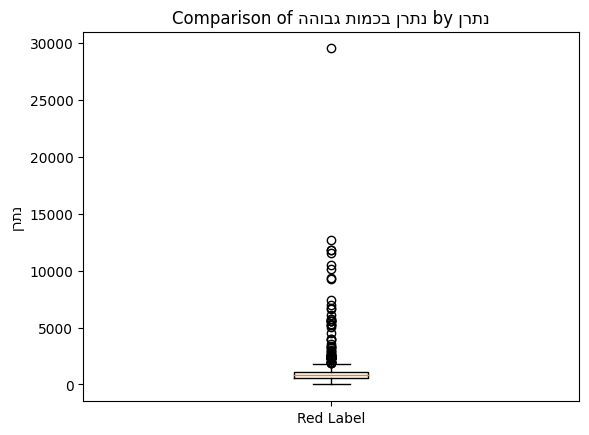

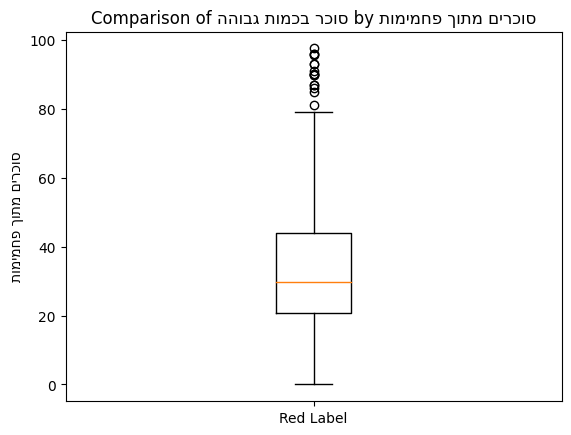

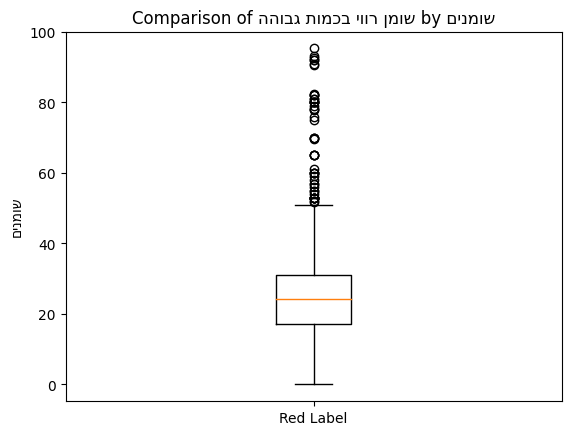

In [5]:
#fig, axs = plt.subplots(2, 2)

BoxPlotCreator(df,'נתרן','נתרן בכמות גבוהה')

BoxPlotCreator(df,'סוכרים מתוך פחמימות','סוכר בכמות גבוהה')

BoxPlotCreator(df,'שומנים','שומן רווי בכמות גבוהה')



# Heatmap:
using a heatmap to view the correlation bewtween the factors you can see that there is a strong correlation between sugars and the sugar symbol
but, when looking at the correlation of sodium and fat and their symbol, we see low number
which means, i need to get rid of the outliers

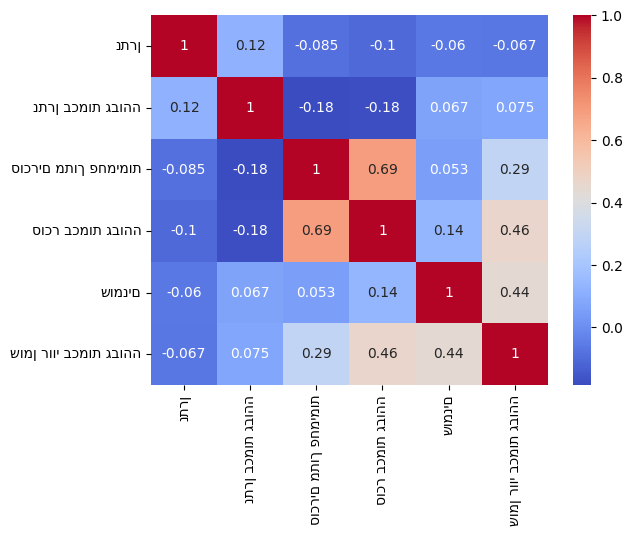

In [6]:
x_col='סוכרים מתוך פחמימות'
y_col='סוכר בכמות גבוהה'
sugar=df[[x_col,y_col]]
dfcor=df[['נתרן','נתרן בכמות גבוהה','סוכרים מתוך פחמימות','סוכר בכמות גבוהה','שומנים','שומן רווי בכמות גבוהה']]
sns.heatmap(dfcor.corr(), cmap='coolwarm', annot=True)


plt.show()

the next heatmap is visualization of the same correlation but without the outliers
what ive done is getting rid of all items with more then 1500 sodium and more then 40 fat for ideal correlation

as i thought, the correlation rised significantly


Shape of dataframe after removing outliers:  (3713, 15)


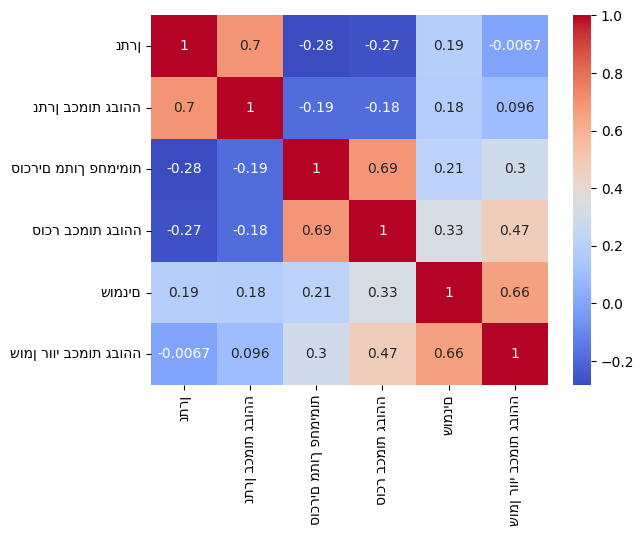

In [7]:
dfoutlier=df.copy()
dfoutlier = dfoutlier[dfoutlier['נתרן'] <= 1500]
dfoutlier = dfoutlier[dfoutlier['שומנים'] <=40]
print("Shape of dataframe after removing outliers: ",dfoutlier.shape)
dfcor=dfoutlier[['נתרן','נתרן בכמות גבוהה','סוכרים מתוך פחמימות','סוכר בכמות גבוהה','שומנים','שומן רווי בכמות גבוהה']]
sns.heatmap(dfcor.corr(), cmap='coolwarm', annot=True)
plt.show()


# Machine learning - Classification:

in the machine learning stage it was obvious ill have to use classification
but what do i classify?
i cant just classify item to a single symbol because there are items that has more then 1 symbol
in order to deal with that i decided that the classes will be all the possible combinations of symbol
which means 8 combinations
the combinations will be represented in a string of 3 bits that will look like : "000","001",.....,"111"
when 0 means there is no symbol and 1 means that there is 
the location of the bit represent the type of symbol
and so - i created the target column as a combination of 3 columns

In [8]:
X = dfoutlier.drop(['נתרן בכמות גבוהה','סוכר בכמות גבוהה','שומן רווי בכמות גבוהה','הסימון הירוק'], axis=1)
y3d = dfoutlier[['נתרן בכמות גבוהה','סוכר בכמות גבוהה','שומן רווי בכמות גבוהה']]  

y1d=dfoutlier.copy()
y1d = y1d[['נתרן בכמות גבוהה','סוכר בכמות גבוהה','שומן רווי בכמות גבוהה']]  
y1d["SumTarget"] = y1d["נתרן בכמות גבוהה"].astype(int).astype(str) + dfoutlier["סוכר בכמות גבוהה"].astype(int).astype(str) + dfoutlier["שומן רווי בכמות גבוהה"].astype(int).astype(str)
target=y1d[['SumTarget']]


display(y3d)
display(target)

,נתרן בכמות גבוהה,סוכר בכמות גבוהה,שומן רווי בכמות גבוהה
שם המוצר,,,
אפונה ירוקה קפואה שופרסל,0.0,0.0,0.0
שעועית ירוקה שלמה שופרסל 800גרם,0.0,0.0,0.0
שעועית עדינה קפואה 600גרם,0.0,0.0,0.0
שעועית צהובה חתוכה שופרס,0.0,0.0,0.0
גרגרי חומוס שופרסל,0.0,0.0,0.0
...,...,...,...
צ'ונגו רצועות שניצל ציפס,0.0,0.0,0.0
צ'ונגו רצועות שניצל צ'ילי חריף מתוק 600 גרם,0.0,0.0,0.0
שניצל דק דק פריך,0.0,0.0,0.0


,SumTarget
שם המוצר,
אפונה ירוקה קפואה שופרסל,000
שעועית ירוקה שלמה שופרסל 800גרם,000
שעועית עדינה קפואה 600גרם,000
שעועית צהובה חתוכה שופרס,000
גרגרי חומוס שופרסל,000
...,...
צ'ונגו רצועות שניצל ציפס,000
צ'ונגו רצועות שניצל צ'ילי חריף מתוק 600 גרם,000
שניצל דק דק פריך,000


In [9]:
X_train1d, X_test1d, y_train1d, y_test1d = train_test_split(X, target, test_size=0.2, random_state=42)

# Naive Bayes:
using the simple naive bayes i got results of:

Accuracy: 0.746971736204576

Precision: 0.766479294265698

Recall: 0.746971736204576

F1-score: 0.754186601588371

and that is after remvoing outliers


In [10]:

NB = GaussianNB()
NB.fit(X_train1d, y_train1d)
y_prednb = NB.predict(X_test1d)


accuracy=accuracy_score(y_test1d, y_prednb)
print("Accuracy:",accuracy)
precision=precision_score(y_test1d, y_prednb, average='weighted')
print("Precision:", precision)
recall=recall_score(y_test1d, y_prednb, average='weighted')
print("Recall:", recall)
f1=f1_score(y_test1d, y_prednb, average='weighted')
print("F1-score:", f1)

NBresults = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

Accuracy: 0.746971736204576
Precision: 0.766479294265698
Recall: 0.746971736204576
F1-score: 0.754186601588371


C:\Users\royi5\anaconda3\envs\notebook\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# KNeighborsClassifier:
in order to visualize the KNN method i had to lower the amount of dimentions into two,
since i didnt want one feature to dominate over another feature i used a scaler

after few tries i found that the optimal amount of neighbors are 5
i used PCA and visualized all 8 categories in a scatterplot

you can see in the graph how certain classes cluster together
and its interesting to see how a cluster of, for example, sugar and fat symbol , is between a cluster of only sugar and a cluster of only fat

the results of the KNN method is much higher then the naive bayes

Accuracy: 0.8600269179004038
Precision: 0.8564946992472131
Recall: 0.8600269179004038
F1-score: 0.8568342579581302
0-no mark
1-mark
         [שומן,סוכר,נתרן]


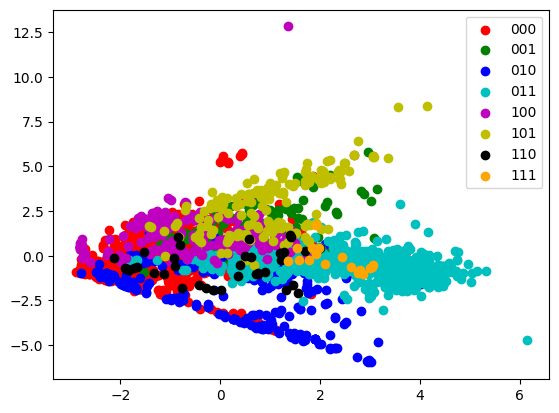

In [11]:

# Scale X data
scaler = StandardScaler()
X_train1d = scaler.fit_transform(X_train1d)
X_test1d = scaler.transform(X_test1d)

# reshape y_train1d to 1d
y_train1d = y_train1d.values.ravel()

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train1d, y_train1d)
y_predknn = knn.predict(X_test1d)

# Dimensionality Reduction
pca = PCA(n_components=2)
X_reducedknn = pca.fit_transform(X_train1d)

# Plot data, with different class labels represented by different colors
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange']
for i, label in enumerate(np.unique(y_train1d)):
    plt.scatter(X_reducedknn[y_train1d == label, 0], X_reducedknn[y_train1d == label, 1], c=colors[i], label=label)
    
accuracy=accuracy_score(y_test1d, y_predknn)
print("Accuracy:",accuracy)
precision = precision_score(y_test1d, y_predknn, average='weighted', zero_division=1)
print("Precision:", precision)
recall=recall_score(y_test1d, y_predknn, average='weighted')
print("Recall:", recall)
f1=f1_score(y_test1d, y_predknn, average='weighted')
print("F1-score:", f1)    

KNNresults = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}  


print("0-no mark\n1-mark\n         [שומן,סוכר,נתרן]")
plt.legend()
plt.show()

# Decision Tree:
 by selecting the most important feature in the data set and splitting the data into subsets based on its values
 the decision tree was able to predict the classes with results of:
 
Accuracy: 0.8627187079407806

Precision: 0.8671700435510626

Recall: 0.8627187079407806

F1-score: 0.8573599694419896

Accuracy: 0.8627187079407806
Precision: 0.8671700435510626
Recall: 0.8627187079407806
F1-score: 0.8573599694419896


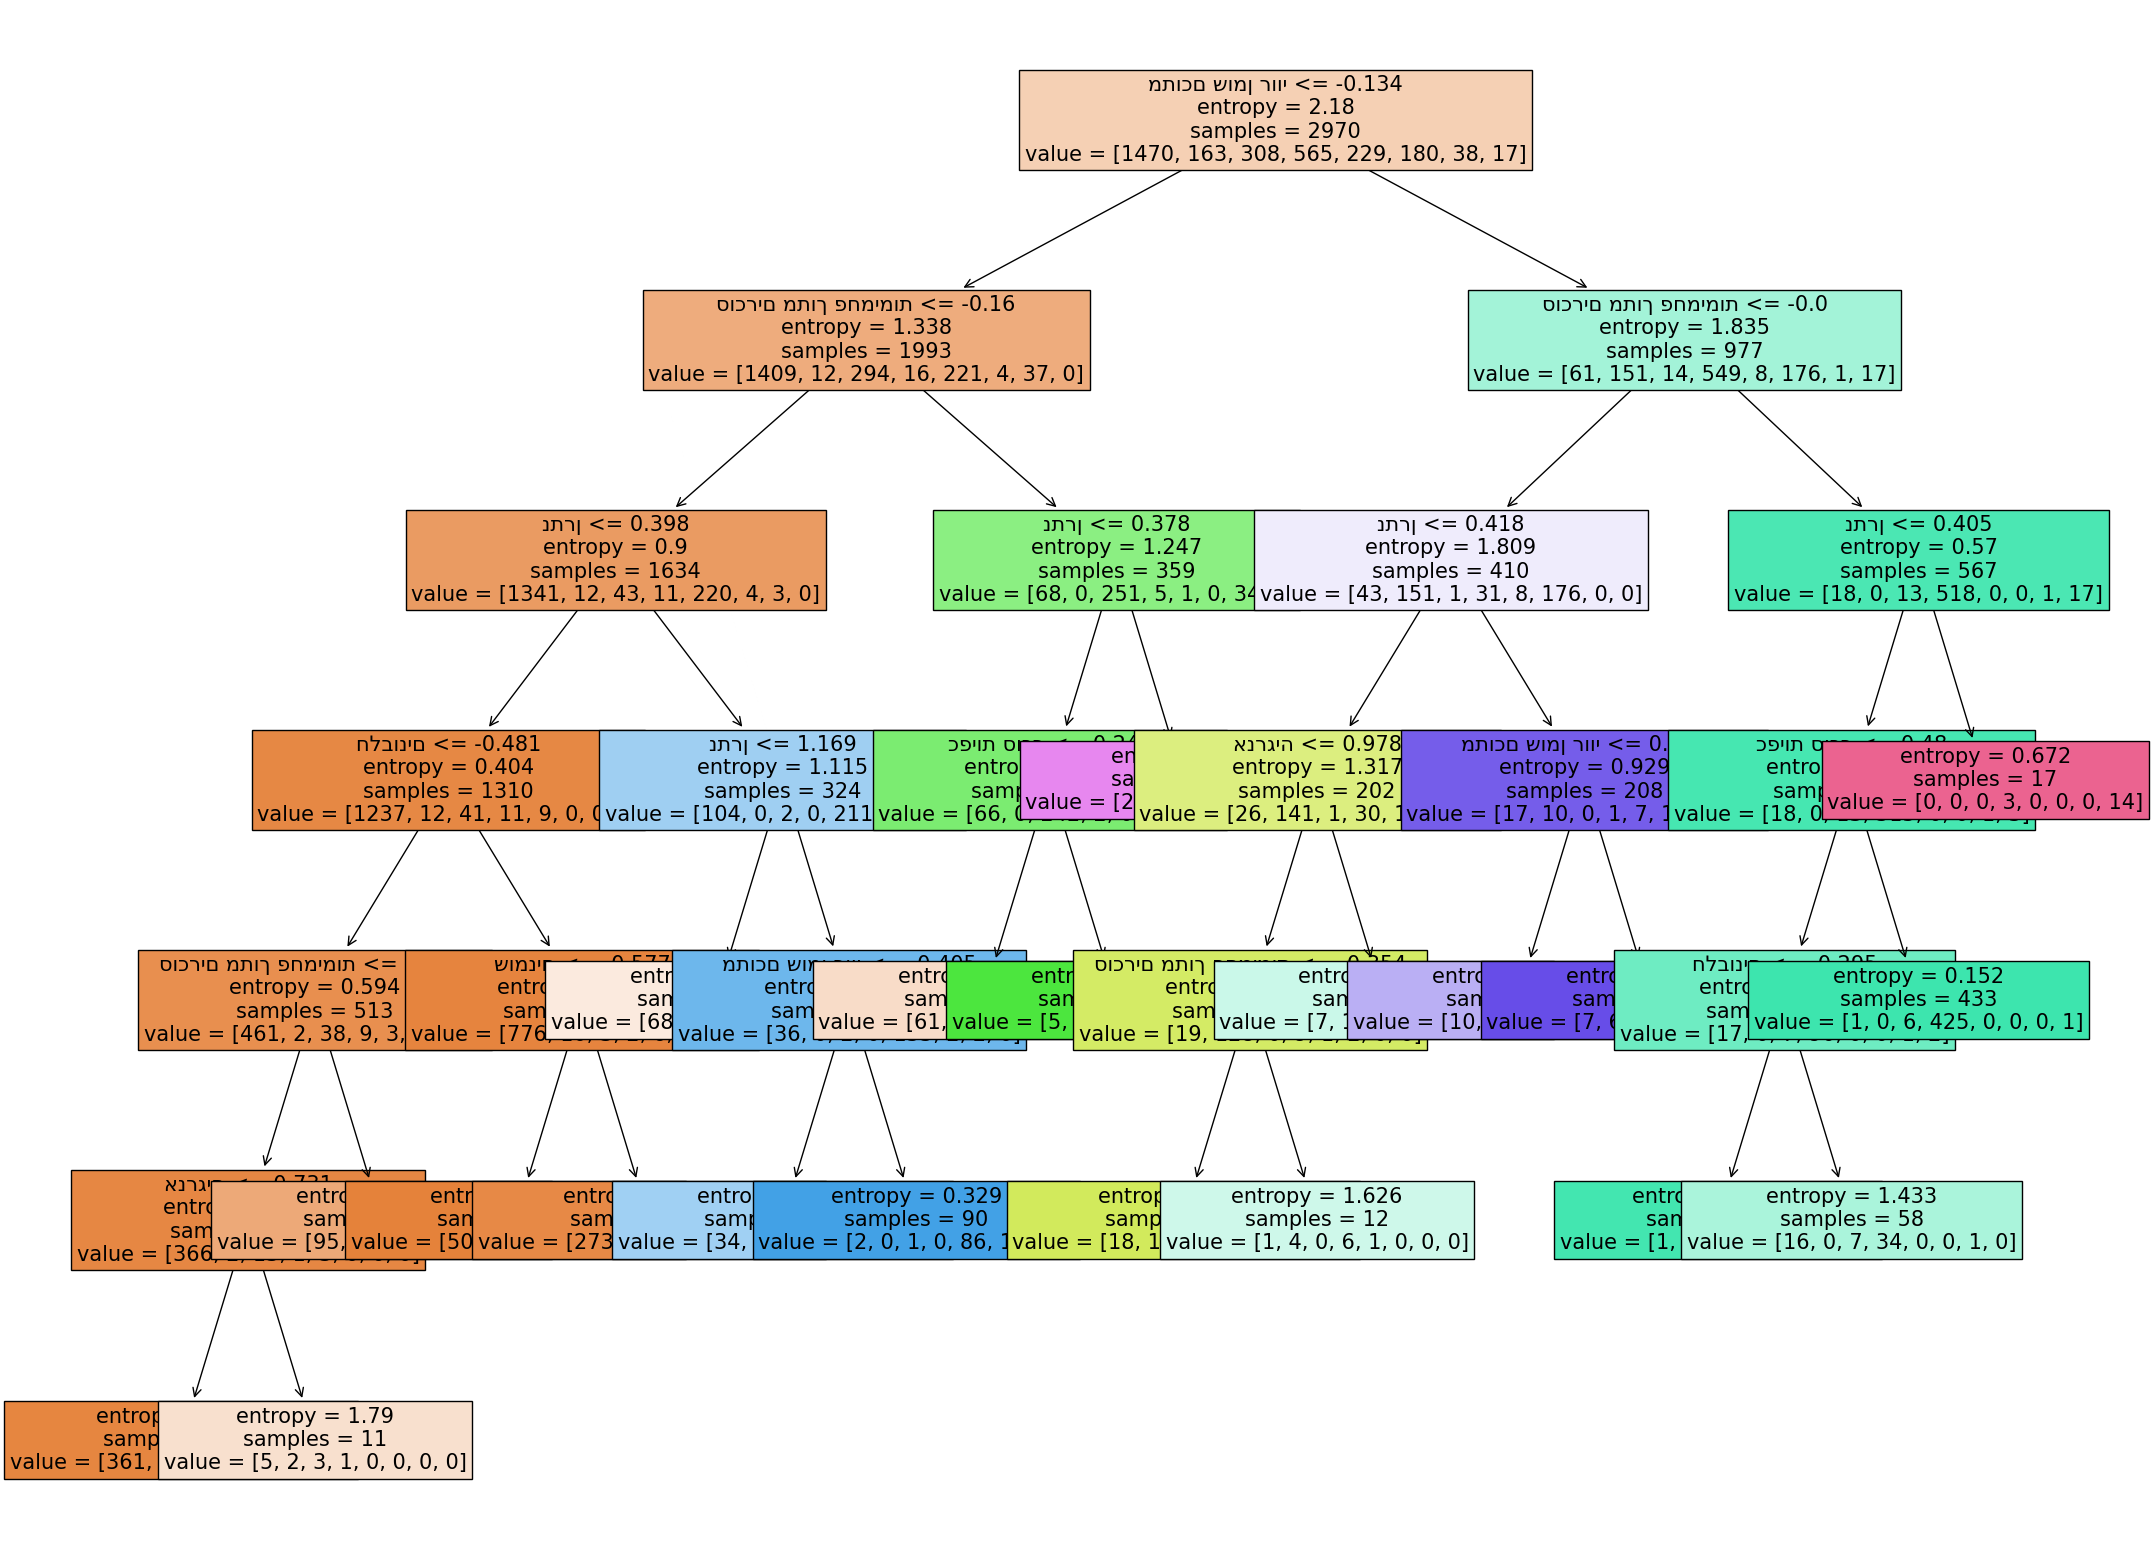

In [12]:
DT = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=10, max_leaf_nodes=20)
DT.fit(X_train1d, y_train1d)
y_preddt = DT.predict(X_test1d)

accuracy=accuracy_score(y_test1d, y_preddt)
print("Accuracy:",accuracy)
precision=precision_score(y_test1d, y_preddt, average='weighted')
print("Precision:", precision)
recall=recall_score(y_test1d, y_preddt, average='weighted')
print("Recall:", recall)
f1=f1_score(y_test1d, y_preddt, average='weighted')
print("F1-score:", f1)

DTresults = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

plt.figure(figsize=(25,20))
plot_tree(DT, filled=True, fontsize=15, feature_names=X.columns)
plt.show()

# Summary
by rearrenging the data in the dataframe in an optimal way i was able to use different machine learning method in order to predict all combinations of symbol
while naive bayes has score of 0.75 i found that other method such as KNN and decision tree found to be usful
in the barplot below you can see the comparsio of the results between all method
the decision tree found to be the best method, only slightly better then KNN

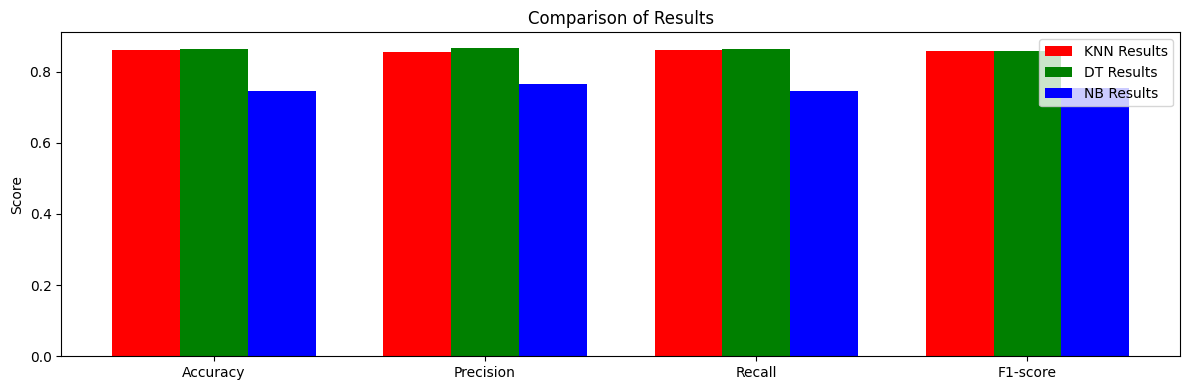

In [13]:

keys = list(KNNresults.keys())

x = np.arange(len(keys))  # the label locations
width = 0.25 

fig, ax = plt.subplots(figsize=(12, 4))
rects1 = ax.bar(x - width, KNNresults.values(), width, label='KNN Results', color='r')
rects2 = ax.bar(x, DTresults.values(), width, label='DT Results', color='g')
rects3 = ax.bar(x + width, NBresults.values(), width, label='NB Results', color='b')


ax.set_ylabel('Score')
ax.set_title('Comparison of Results')
ax.set_xticks(x)
ax.set_xticklabels(keys)
ax.legend()

fig.tight_layout()

plt.show()